In [37]:
from importlib import reload

import matplotlib.pyplot as plt
import torch

from diffdrr.drr import DRR
from diffdrr.data import load_example_ct
from diffdrr.visualization import plot_drr

## library to read lung cancer database
import pylidc as pl

### Read Lung Cancer Database files
Follow instructions at:

https://pylidc.github.io/

When running the code below, if getting errors such as np.bool not found or np.int not found, change the sources as follows

- replace *np.int* by *int*

- replace *np.bool* by *bool*

In [ ]:
# Query for all CT scans with desired traits.
scans = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <= 1,
                                 pl.Scan.pixel_spacing <= 0.6)
print(scans.count())
# => 31

pid = 'LIDC-IDRI-0078' # patient ID 
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first() # scan class instance for patient ID

In [45]:
vol = scan.to_volume() # creating numpy array with scan volume
vol_shape=vol.shape
print(vol_shape)
print(type(vol))

Loading dicom files ... This may take a moment.
(512, 512, 87)
<class 'numpy.ndarray'>


### Visualize mid slice of CT volume

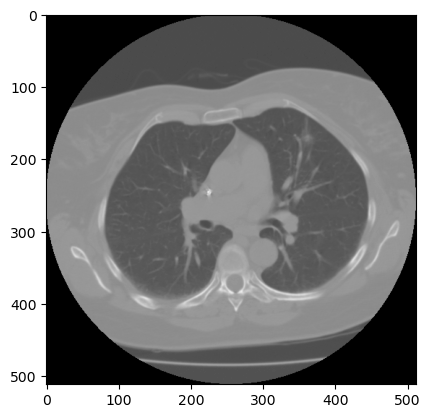

In [48]:
plt.imshow(vol[:, :, round(vol_shape[2]/2)].squeeze(), cmap='gray')

### Read annotations for CT volumes

In [49]:
nods = scan.cluster_annotations()

print("%s has %d nodules." % (scan, len(nods)))
# => Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.

for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i])))

Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.
Nodule 1 has 4 annotations.
Nodule 2 has 4 annotations.
Nodule 3 has 1 annotations.
Nodule 4 has 4 annotations.


In [53]:
ann = pl.query(pl.Annotation)
print(ann)

SELECT annotations.id AS annotations_id, annotations.scan_id AS annotations_scan_id, annotations._nodule_id AS annotations__nodule_id, annotations.subtlety AS annotations_subtlety, annotations."internalStructure" AS "annotations_internalStructure", annotations.calcification AS annotations_calcification, annotations.sphericity AS annotations_sphericity, annotations.margin AS annotations_margin, annotations.lobulation AS annotations_lobulation, annotations.spiculation AS annotations_spiculation, annotations.texture AS annotations_texture, annotations.malignancy AS annotations_malignancy 
FROM annotations


In [2]:
# Read in the volume and get the isocenter
volume, spacing = load_example_ct()
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2

# Initialize the DRR module for generating synthetic X-rays
#device = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [3]:
"""drr = DRR(
    volume,      # The CT volume as a numpy array
    spacing,     # Voxel dimensions of the CT
    sdr=300.0,   # Source-to-detector radius (half of the source-to-detector distance)
    height=800,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=1.0,    # Pixel spacing (in mm)
).to(device)
"""
drr = DRR(
    volume,      # The CT volume as a numpy array
    spacing,     # Voxel dimensions of the CT
    sdr=1000.0,   # Source-to-detector radius (half of the source-to-detector distance)
    height=200,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=4.0,    # Pixel spacing (in mm)
).to(device)

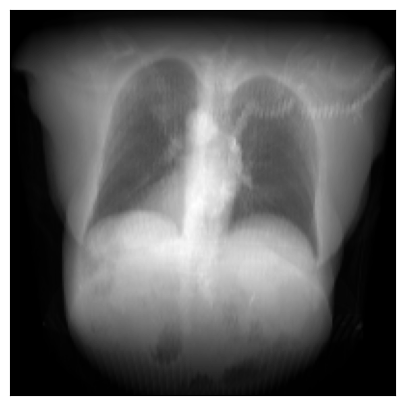

In [4]:
# Set the camera pose with rotation (yaw, pitch, roll) and translation (x, y, z)
rotation = torch.tensor([[torch.pi, 0.0, torch.pi / 2]], device=device)
rotation = torch.tensor([[torch.pi, 0.0, torch.pi / 2]], device=device)
rotation = torch.tensor([[0.0, 2*torch.pi/10 , torch.pi / 2]], device=device)
translation = torch.tensor([[bx, by, bz]], device=device)

# 📸 Also note that DiffDRR can take many representations of SO(3) 📸
# For example, quaternions, rotation matrix, axis-angle, etc...
img = drr(rotation, translation, parameterization="euler_angles", convention="ZYX")
plot_drr(img, ticks=False)
plt.show()

0.0


<Figure size 640x480 with 0 Axes>

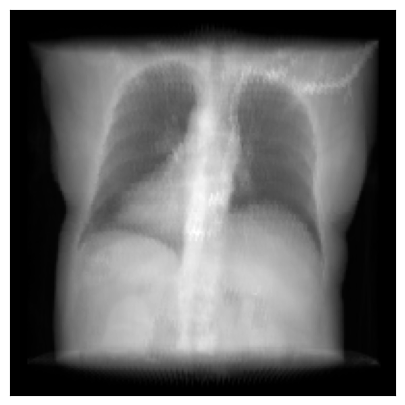

0.3141592653589793


<Figure size 640x480 with 0 Axes>

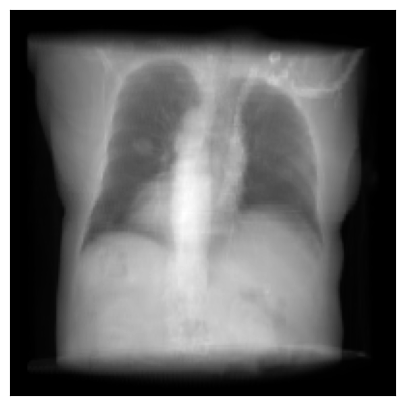

0.6283185307179586


<Figure size 640x480 with 0 Axes>

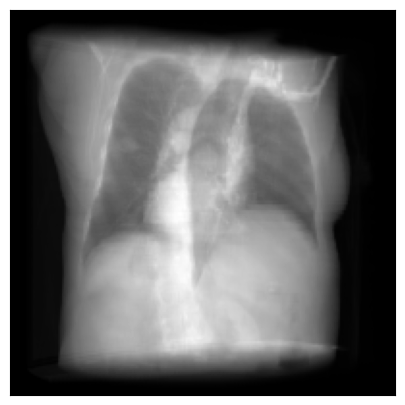

0.9424777960769379


<Figure size 640x480 with 0 Axes>

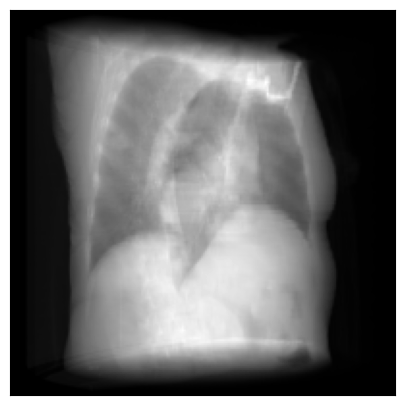

1.2566370614359172


<Figure size 640x480 with 0 Axes>

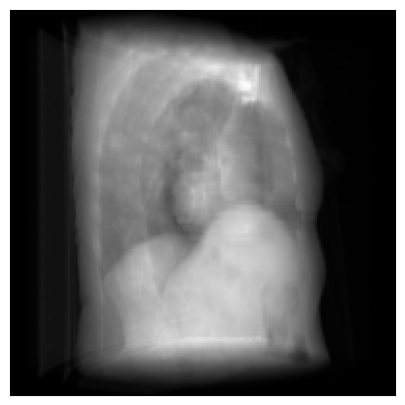

1.5707963267948966


<Figure size 640x480 with 0 Axes>

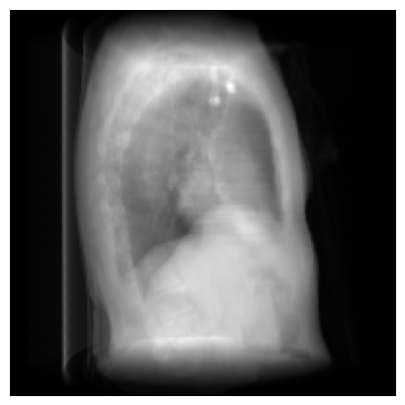

1.8849555921538759


<Figure size 640x480 with 0 Axes>

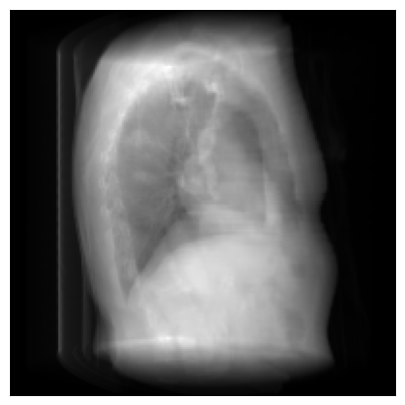

2.199114857512855


<Figure size 640x480 with 0 Axes>

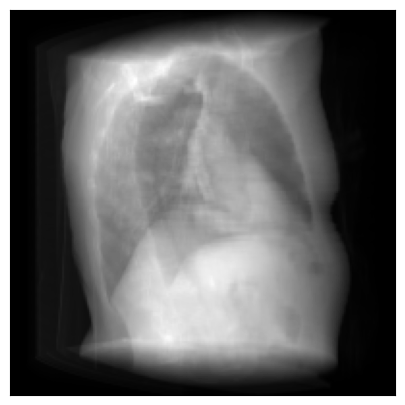

2.5132741228718345


<Figure size 640x480 with 0 Axes>

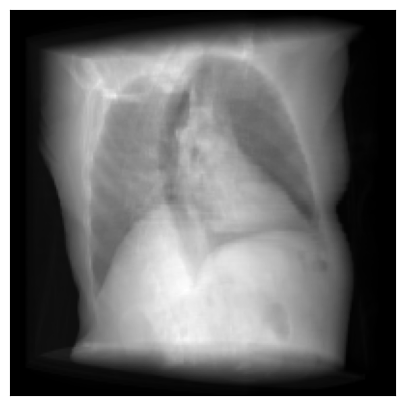

2.827433388230814


<Figure size 640x480 with 0 Axes>

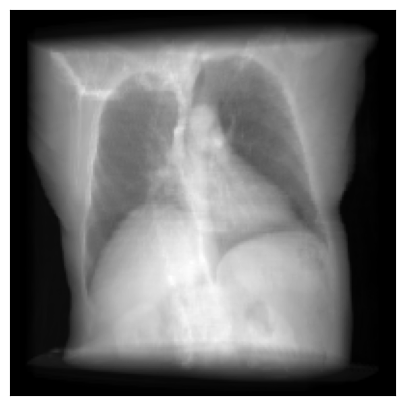

3.141592653589793


<Figure size 640x480 with 0 Axes>

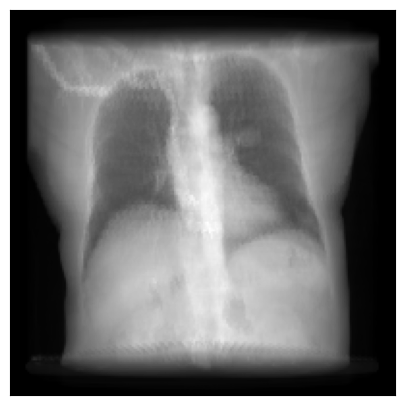

3.455751918948772


<Figure size 640x480 with 0 Axes>

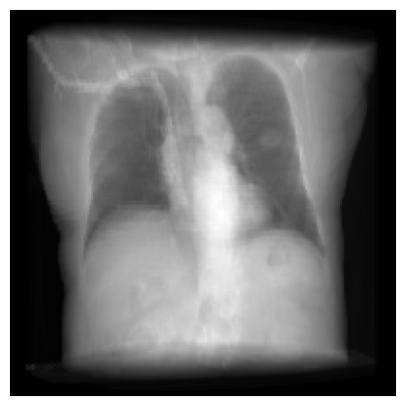

3.7699111843077517


<Figure size 640x480 with 0 Axes>

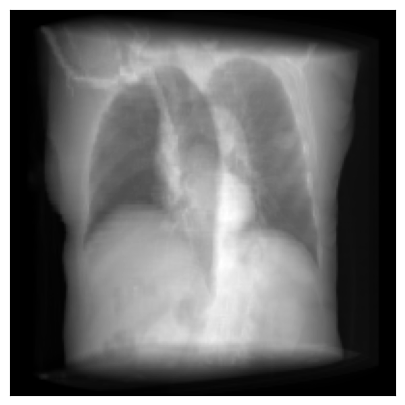

4.084070449666731


<Figure size 640x480 with 0 Axes>

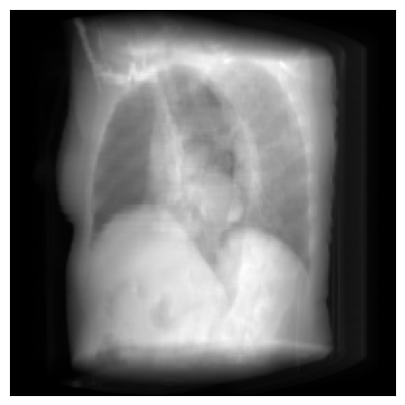

4.39822971502571


<Figure size 640x480 with 0 Axes>

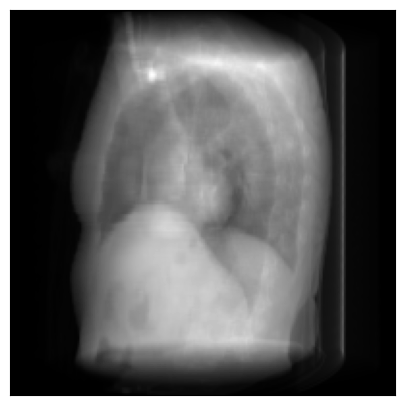

4.71238898038469


<Figure size 640x480 with 0 Axes>

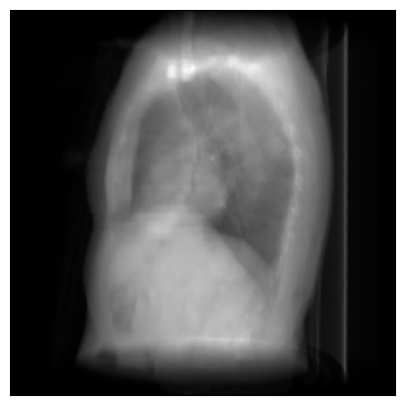

5.026548245743669


<Figure size 640x480 with 0 Axes>

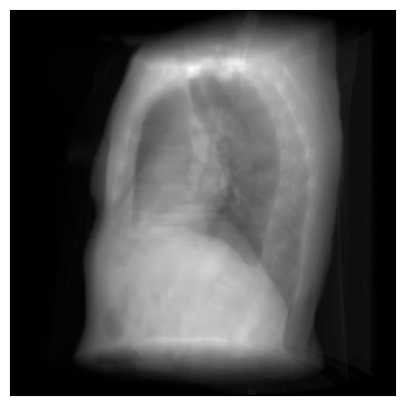

5.340707511102648


<Figure size 640x480 with 0 Axes>

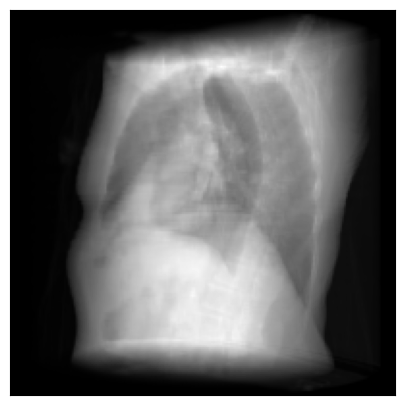

5.654866776461628


<Figure size 640x480 with 0 Axes>

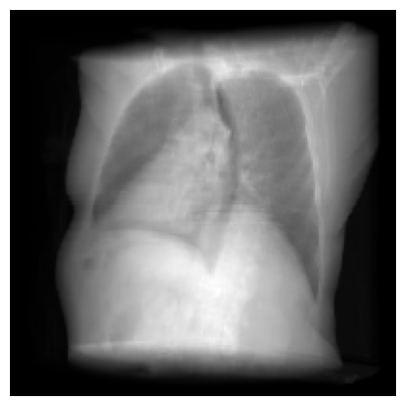

5.969026041820607


<Figure size 640x480 with 0 Axes>

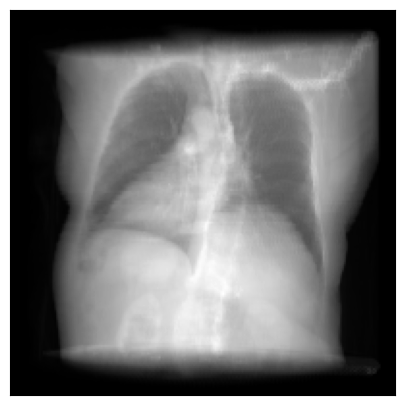

In [5]:
N_views = 20
for idx_x in range(N_views):
    rad_x = idx_x*2*torch.pi/N_views
    print(rad_x)
    rotation = torch.tensor([[rad_x, 0.0 , torch.pi / 2]], device=device)
    translation = torch.tensor([[bx, by, bz]], device=device)

    # 📸 Also note that DiffDRR can take many representations of SO(3) 📸
    # For example, quaternions, rotation matrix, axis-angle, etc...
    img = drr(rotation, translation, parameterization="euler_angles", convention="ZYX")
    plt.figure()
    plot_drr(img, ticks=False)
    plt.show()

### Read XML files
Follow instructions at:

https://pylidc.github.io/

When running the code below, if getting errors such as np.bool not found or np.int not found, change the sources as follows

- replace *np.int* by *int*

- replace *np.bool* by *bool*


In [27]:
import pylidc as pl
#import SimpleITK as sitk
import itk

pl=reload(pl)

In [7]:
# Query for all CT scans with desired traits.
scans = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <= 1,
                                 pl.Scan.pixel_spacing <= 0.6)
print(scans.count())
# => 31

pid = 'LIDC-IDRI-0078'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
#print(pl)


31


In [8]:
nods = scan.cluster_annotations()

print("%s has %d nodules." % (scan, len(nods)))
# => Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.

for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i])))

Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.
Nodule 1 has 4 annotations.
Nodule 2 has 4 annotations.
Nodule 3 has 1 annotations.
Nodule 4 has 4 annotations.


Loading dicom files ... This may take a moment.


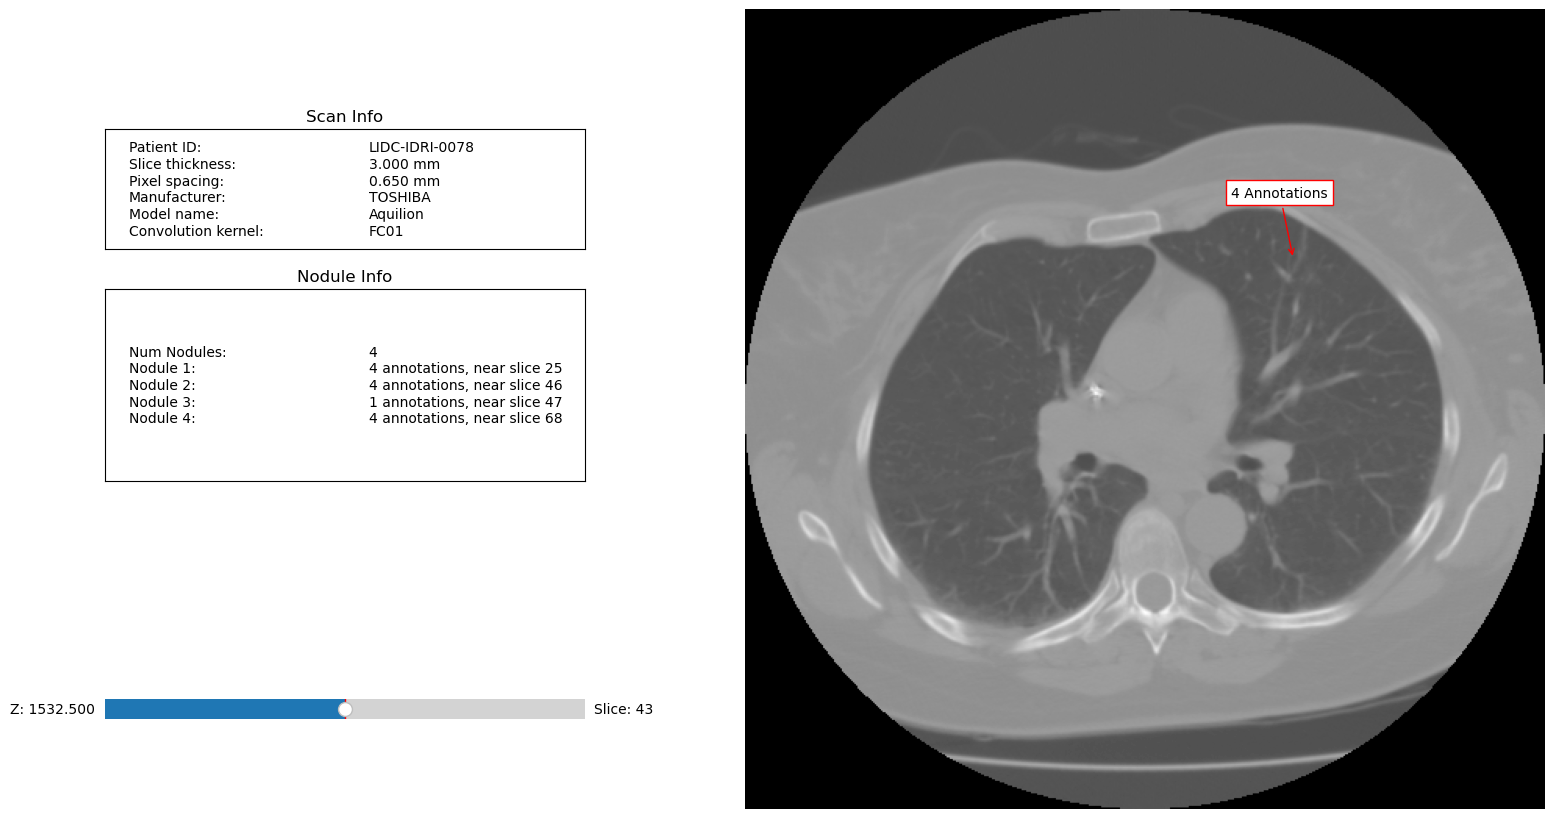

In [9]:
scan.visualize(annotation_groups=nods)

In [10]:

ann = pl.query(pl.Annotation).first()
print(ann.scan.patient_id)

LIDC-IDRI-0078


In [11]:
anns = pl.query(pl.Annotation).filter(pl.Annotation.spiculation == 5,
                                      pl.Annotation.malignancy == 5)
print(anns.count())


91


In [12]:
ann = pl.query(pl.Annotation)\
        .filter(pl.Annotation.malignancy == 5).first()

print(ann.malignancy, ann.Malignancy)
# => 5, 'Highly Suspicious'

print(ann.margin, ann.Margin)
# => 2, 'Near Poorly Defined'

5 Highly Suspicious
2 Near Poorly Defined


In [13]:
ann = pl.query(pl.Annotation).first()
contours = ann.contours

print(contours[0])
# => Contour(id=21,annotation_id=1)

Contour(id=1,annotation_id=1)


In [15]:
mask = ann.boolean_mask()
print(mask.shape, mask.dtype)
# => (34, 27, 6), dtype('bool')

(34, 27, 6) bool


In [36]:
bbox = ann.bbox()
print(bbox)
# => (slice(151, 185, None), slice(349, 376, None), slice(44, 50, None))

vol = ann.scan.to_volume()
print(vol[bbox].shape)
print(vol.shape)
# => (34, 27, 6)

(slice(151, 185, None), slice(349, 376, None), slice(44, 50, None))
Loading dicom files ... This may take a moment.
(34, 27, 6)
(512, 512, 87)


In [17]:
print(ann.bbox_dims())

[21.45 16.9  15.  ]


In [23]:
print(scan.sorted_dicom_file_names)
print(scan.get_path_to_dicom_files())

35.dcm,78.dcm,52.dcm,64.dcm,53.dcm,48.dcm,18.dcm,59.dcm,79.dcm,85.dcm,23.dcm,15.dcm,65.dcm,3.dcm,5.dcm,57.dcm,84.dcm,42.dcm,30.dcm,56.dcm,77.dcm,4.dcm,81.dcm,75.dcm,66.dcm,29.dcm,44.dcm,34.dcm,58.dcm,20.dcm,19.dcm,24.dcm,21.dcm,83.dcm,60.dcm,26.dcm,51.dcm,82.dcm,28.dcm,13.dcm,2.dcm,7.dcm,39.dcm,16.dcm,31.dcm,55.dcm,86.dcm,74.dcm,41.dcm,43.dcm,25.dcm,36.dcm,22.dcm,46.dcm,8.dcm,10.dcm,17.dcm,27.dcm,61.dcm,50.dcm,54.dcm,6.dcm,12.dcm,37.dcm,49.dcm,80.dcm,33.dcm,32.dcm,0.dcm,73.dcm,45.dcm,38.dcm,62.dcm,72.dcm,67.dcm,14.dcm,68.dcm,9.dcm,11.dcm,1.dcm,76.dcm,69.dcm,47.dcm,63.dcm,70.dcm,71.dcm,40.dcm
/media/julianb/1B55FEFA65705B5F/JB/data/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0078/1.3.6.1.4.1.14519.5.2.1.6279.6001.339170810277323131167631068432/1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102183795724852353824


In [21]:
help(s
can)

Help on Scan in module pylidc.Scan object:

class Scan(sqlalchemy.orm.decl_api.Base)
 |  Scan(**kwargs)
 |  
 |  The Scan model class refers to the top-level XML file from the LIDC.
 |  A scan has many :class:`pylidc.Annotation` objects, which correspond
 |  to the `unblindedReadNodule` XML attributes for the scan.
 |  
 |  Attributes
 |  ==========
 |  
 |  study_instance_uid: string
 |      DICOM attribute (0020,000D).
 |  
 |  series_instance_uid: string 
 |      DICOM attribute (0020,000E).
 |  
 |  patient_id: string
 |      Identifier of the form "LIDC-IDRI-dddd" where dddd is a string of 
 |      integers.
 |  
 |  slice_thickness: float
 |      DICOM attribute (0018,0050). Note that this may not be 
 |      equal to the `slice_spacing` attribute (see below).
 |  
 |  slice_zvals: ndarray
 |      The "z-values" for the slices of the scan (i.e.,
 |      the last coordinate of the ImagePositionPatient DICOM attribute)
 |      as a NumPy array sorted in increasing order.
 |  
 |  s

In [35]:

PixelType = itk.ctype("signed short")
Dimension = 3

ImageType = itk.Image[PixelType, Dimension]

dirName = scan.get_path_to_dicom_files()
namesGenerator = itk.GDCMSeriesFileNames.New()
namesGenerator.SetUseSeriesDetails(True)
namesGenerator.AddSeriesRestriction("0008|0021")
namesGenerator.SetGlobalWarningDisplay(False)
namesGenerator.SetDirectory(dirName)

seriesUID = namesGenerator.GetSeriesUIDs()

if len(seriesUID) < 1:
    print("No DICOMs in: " + dirName)
    sys.exit(1)

print("The directory: " + dirName)
print("Contains the following DICOM Series: ")
for uid in seriesUID:
    print(uid)

seriesFound = False
for uid in seriesUID:
    seriesIdentifier = uid
    print("Reading: " + seriesIdentifier)
    fileNames = namesGenerator.GetFileNames(seriesIdentifier)

    reader = itk.ImageSeriesReader[ImageType].New()
    dicomIO = itk.GDCMImageIO.New()
    reader.SetImageIO(dicomIO)
    reader.SetFileNames(fileNames)
    reader.ForceOrthogonalDirectionOff()
    reader.Update()

    """
    writer = itk.ImageFileWriter[ImageType].New()
    outFileName = os.path.join(dirName, seriesIdentifier + ".nrrd")
    if args.output_image:
        outFileName = args.output_image
    writer.SetFileName(outFileName)
    writer.UseCompressionOn()
    writer.SetInput(reader.GetOutput())
    print("Writing: " + outFileName)
    writer.Update()
    """
    itk_image = reader.GetOutput()
    im_view_np = itk.GetArrayViewFromImage(itk_image)
    print(itk_image)

    

    if seriesFound:
        break





The directory: /media/julianb/1B55FEFA65705B5F/JB/data/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0078/1.3.6.1.4.1.14519.5.2.1.6279.6001.339170810277323131167631068432/1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102183795724852353824
Contains the following DICOM Series: 
1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102183795724852353824.31653.051251220000101
Reading: 1.3.6.1.4.1.14519.5.2.1.6279.6001.303494235102183795724852353824.31653.051251220000101
Image (0x55e718672610)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 2
  Modified Time: 3196
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (0x55e71b019870) 
  Source output name: Primary
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 169
  UpdateMTime: 3197
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 87]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 87]
  RequestedRegion: 